# Imports


In [1]:
import pandas as pd
from utils_clustering import plot_comparing_avr_clusters, boxplot_grid
import warnings
import numpy as np
import geopandas as gpd


warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option("display.max_columns", None)

In [2]:
%cd ..
classified_data = pd.read_csv('datasets/Final_classified_data.csv', index_col=0)
%cd Modelling

c:\Users\luisb\OneDrive\Documentos\uni\Year 2\Semester 2\Machine learning 2\ML2_project
c:\Users\luisb\OneDrive\Documentos\uni\Year 2\Semester 2\Machine learning 2\ML2_project\Modelling


# Introduction

In this notebook we will analyze our clusters one by one:


We will start by obtaining the centroids for our final clusters.

In [3]:
final_cluster_centroids = classified_data.drop(['customer_name'], axis=1).groupby('Final_Cluster').mean().reset_index()
final_cluster_centroids

,Final_Cluster,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure,Bsc.,Hsc.,Msc.,Phd.
0,Fishermen,0.02,0.03,0.51,1.00,26.72,0.37,10.03,0.78,0.60,0.19,0.17,71.03,0.20,0.00,0.00,19.88,39.91,54.33,0.51,0.80,54233.45,12.74,0.01,0.99,0.00,0.00
1,Gamers,1.00,1.00,0.50,1.39,35.52,20.20,13.63,1.30,1.56,2.63,5.22,10.41,5.21,10.45,7.83,100.58,6.94,55.22,0.50,0.50,39119.82,12.86,0.13,0.60,0.13,0.14
2,Loyal Customers,1.02,0.83,1.00,2.02,29.35,12.08,9.54,1.79,3.56,5.96,5.94,11.78,12.00,5.99,11.97,1071.76,20.09,55.16,0.51,0.80,16875.32,15.50,0.10,0.70,0.09,0.10
3,Parents,3.04,2.00,1.00,1.11,37.87,14.65,17.62,3.80,3.82,2.29,7.60,7.60,7.55,7.54,7.57,512.17,19.96,55.61,0.49,0.60,13248.83,13.09,0.07,0.80,0.06,0.06
4,Pet lovers,0.00,0.01,0.50,1.00,46.10,0.78,11.86,0.98,2.46,0.20,1.00,1.00,0.39,0.00,47.14,51.71,19.88,55.33,0.49,0.20,21527.46,12.95,0.00,1.00,0.00,0.00
5,Promotions,0.68,0.94,0.92,2.71,34.13,5.10,12.73,5.14,6.23,6.76,7.75,8.84,8.97,7.27,10.14,404.98,40.25,55.22,0.50,0.67,5967.65,12.83,0.03,0.90,0.03,0.04
6,Vegetarians,1.00,0.42,0.51,1.16,50.25,6.57,13.73,16.46,5.01,1.94,0.03,0.05,8.26,3.37,8.37,201.99,20.21,55.06,0.50,0.50,6064.00,12.93,0.14,0.60,0.13,0.13
7,Young party people,0.30,0.00,0.00,1.35,15.24,9.53,18.87,1.76,10.10,39.19,3.35,3.49,9.63,5.83,1.99,53.65,14.20,24.02,0.49,0.50,5399.13,2.24,0.02,0.95,0.02,0.02
8,"Young, lots of electronics",0.32,0.14,0.09,1.39,34.73,26.66,13.89,2.23,2.26,3.64,5.10,7.20,5.41,7.03,6.01,553.70,20.21,30.16,0.49,0.51,14182.38,7.74,0.16,0.54,0.15,0.15


Below are some visualizations to help us explain our clusters.

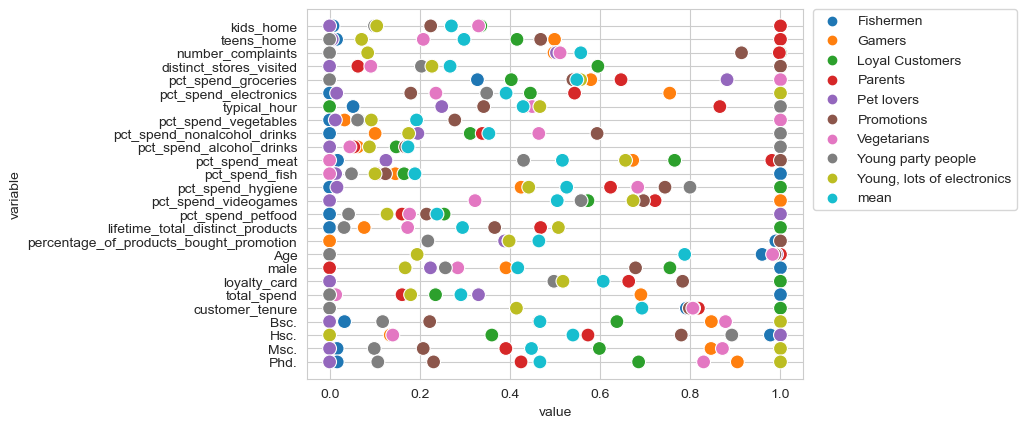

In [4]:
plot_comparing_avr_clusters(final_cluster_centroids, colum_to_keep='Final_Cluster')

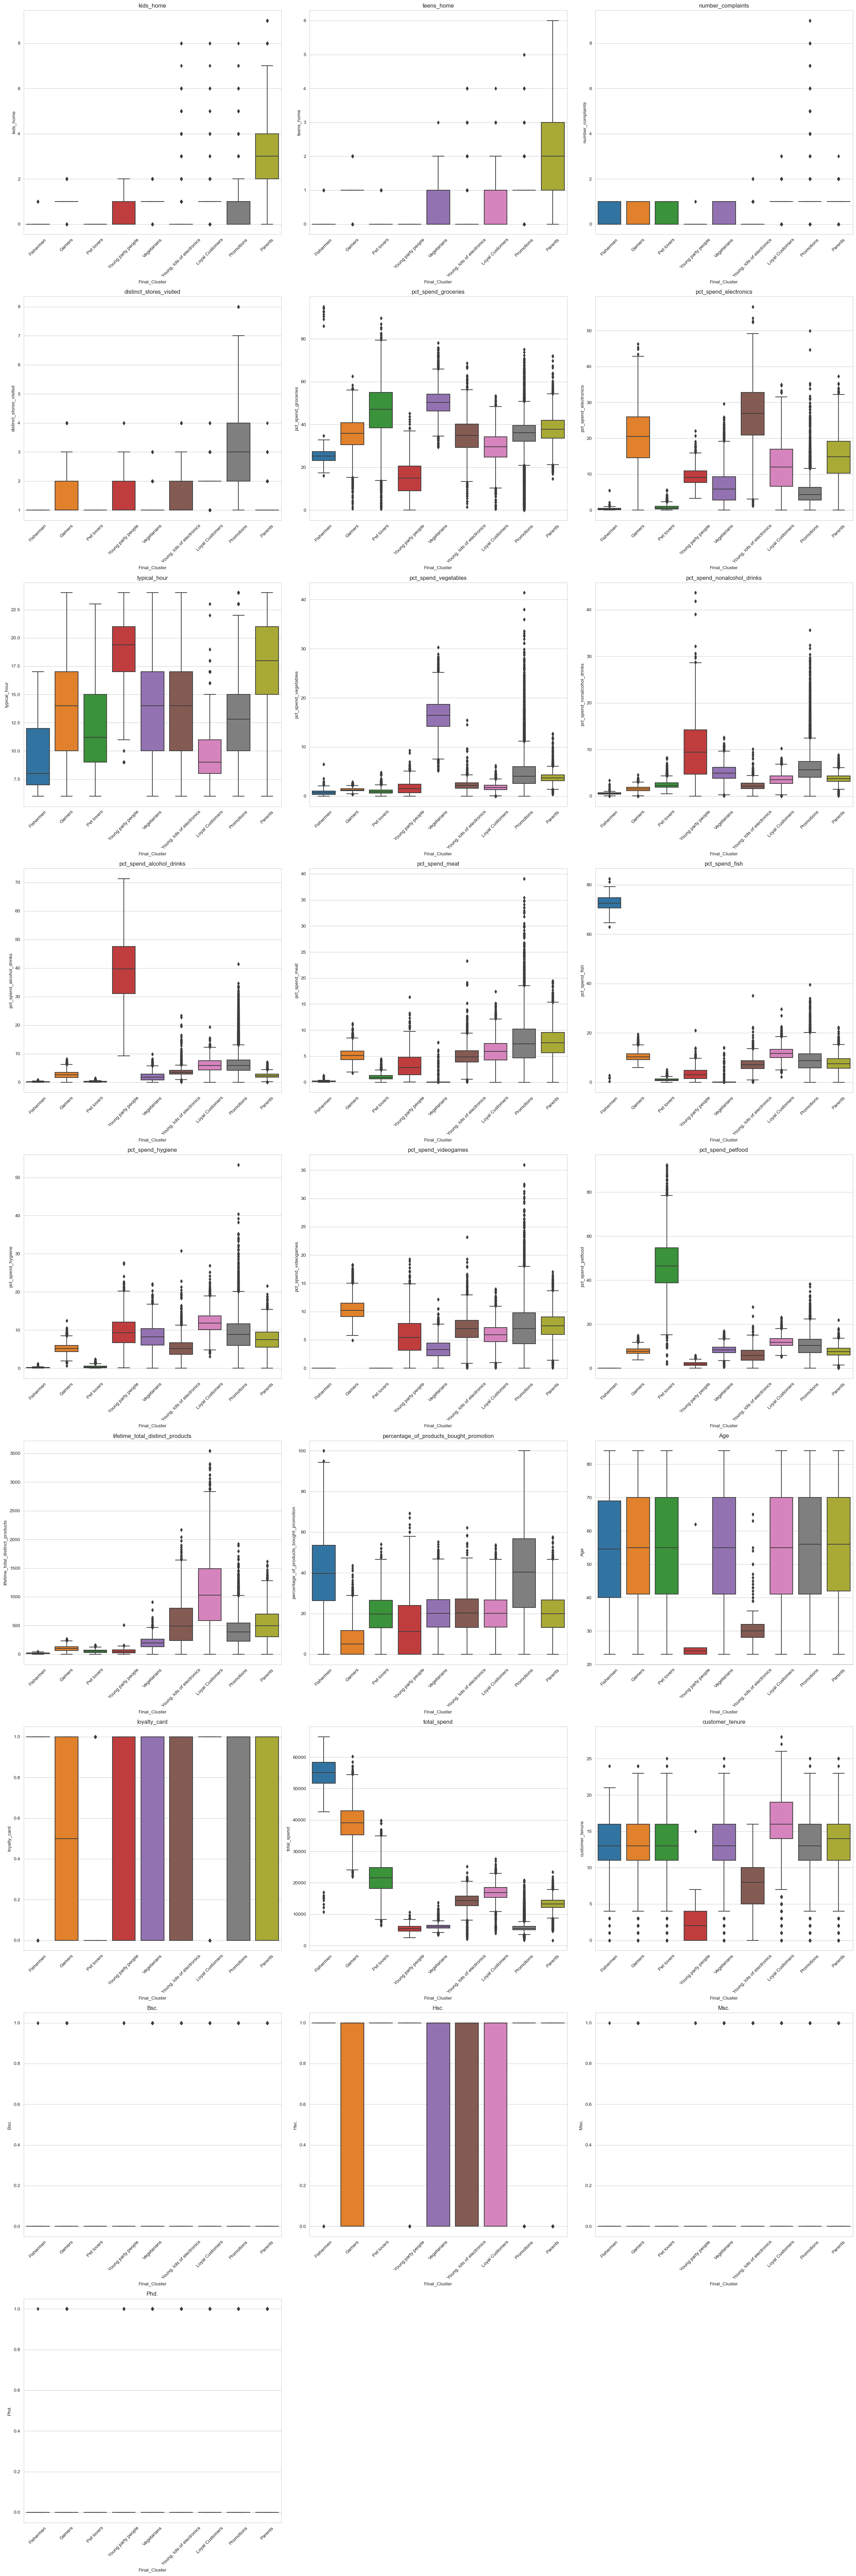

In [5]:
boxplot_grid(classified_data, classified_data.drop('male', axis=1).select_dtypes(include=np.number).columns)

# Cluster characteristics

We will now take a look at each cluster individually.

## Fishermen

In [6]:
final_cluster_centroids[final_cluster_centroids.Final_Cluster == 'Fishermen']

,Final_Cluster,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure,Bsc.,Hsc.,Msc.,Phd.
0,Fishermen,0.02,0.03,0.51,1.00,26.72,0.37,10.03,0.78,0.60,0.19,0.17,71.03,0.20,0.00,0.00,19.88,39.91,54.33,0.51,0.80,54233.45,12.74,0.01,0.99,0.00,0.00


This was the first cluster we found, through a geographical analysis. This group is very easy to describe:
+ Very high percentage spent on fish (70% +)
+ For all other categories (other than groceries) the percentage is nearly 0
+ Highest average total spent
+ Only visited 1 store
+ Basically no children
+ Not a lot of registered complaints
+ Large majority has a loyalty card
+ Similar average age to others
+ Buying with a promotion 40% of the time
<p>Looking at all these characteristics, we believe these may be fishermen buying bait and supllies for their fishing trips.

## Gamers

In [7]:
final_cluster_centroids[final_cluster_centroids.Final_Cluster == 'Gamers']

,Final_Cluster,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure,Bsc.,Hsc.,Msc.,Phd.
1,Gamers,1.00,1.00,0.50,1.39,35.52,20.20,13.63,1.30,1.56,2.63,5.22,10.41,5.21,10.45,7.83,100.58,6.94,55.22,0.50,0.50,39119.82,12.86,0.13,0.60,0.13,0.14


This was one of the easiest clusters to find as it is very spherical and isolated. This group can be described by:
+ Very high percentage spent on videogames and electronics
+ Buying with promotions very rarely (<10% of the time, lowest of all clusters)
+ Second Highest average total spent
+ Having some children
+ Not a lot of registered complaints
+ Generally only visit 1 store
+ Similar average age to others

## Pet lovers

In [8]:
final_cluster_centroids[final_cluster_centroids.Final_Cluster == 'Pet lovers']

,Final_Cluster,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure,Bsc.,Hsc.,Msc.,Phd.
4,Pet lovers,0.00,0.01,0.50,1.00,46.10,0.78,11.86,0.98,2.46,0.20,1.00,1.00,0.39,0.00,47.14,51.71,19.88,55.33,0.49,0.20,21527.46,12.95,0.00,1.00,0.00,0.00


This was also an easy cluster to find as it is also very spherical and isolated. This group can be described by:
+ Very high percentage spent on pet food (almost 50%)
+ Buying a very low number of different products
+ Not having any children
+ Not a lot of registered complaints
+ Generally only visiting 1 store
+ Similar average age to others
+ Other than pet food and groceries all other percentages are below 5%

## Young party people

In [9]:
final_cluster_centroids[final_cluster_centroids.Final_Cluster == 'Young party people']

,Final_Cluster,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure,Bsc.,Hsc.,Msc.,Phd.
7,Young party people,0.30,0.00,0.00,1.35,15.24,9.53,18.87,1.76,10.10,39.19,3.35,3.49,9.63,5.83,1.99,53.65,14.20,24.02,0.49,0.50,5399.13,2.24,0.02,0.95,0.02,0.02


This cluster shows a couple of very specific patterns, thus the name. This group can be described by:
+ Very high percentage spent on drinks (both alcoholic and not)
+ Buying a very low number of different products
+ Not having any children, generally
+ No registered complaints
+ Generally only visiting 1 store
+ Lowest average age of all clusters
+ A relatively large percentage spent on hygiene products 

## Vegetarians

In [10]:
final_cluster_centroids[final_cluster_centroids.Final_Cluster == 'Vegetarians']

,Final_Cluster,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure,Bsc.,Hsc.,Msc.,Phd.
6,Vegetarians,1.00,0.42,0.51,1.16,50.25,6.57,13.73,16.46,5.01,1.94,0.03,0.05,8.26,3.37,8.37,201.99,20.21,55.06,0.50,0.50,6064.00,12.93,0.14,0.60,0.13,0.13


This cluster was also a relatively easy one to find. This group can be described by:
+ Very high relative percentage spent on vegetables and groceries
+ Very low percentages spent on meat and fish (essentially 0)
+ Having young children, and in some cases teens
+ Not a lot of registered complaints
+ Generally only visiting 1 store
+ Similar average age to others

## Young, lots of electronics

In [11]:
final_cluster_centroids[final_cluster_centroids.Final_Cluster == 'Young, lots of electronics']

,Final_Cluster,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure,Bsc.,Hsc.,Msc.,Phd.
8,"Young, lots of electronics",0.32,0.14,0.09,1.39,34.73,26.66,13.89,2.23,2.26,3.64,5.10,7.20,5.41,7.03,6.01,553.70,20.21,30.16,0.49,0.51,14182.38,7.74,0.16,0.54,0.15,0.15


As it is clear from the name this group posesses two defining characteristics, but also some others which are interesting:
+ Highest percentage spent on electronics
+ In some cases have kids and teens but not generally
+ Essentially no complaints
+ Generally only visting 1 store
+ Lower average customer_tenure than most other clusters
+ Second lowest average age of all clusters
+ Highest average education level

## Loyal Customers

In [12]:
final_cluster_centroids[final_cluster_centroids.Final_Cluster == 'Loyal Customers']

,Final_Cluster,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure,Bsc.,Hsc.,Msc.,Phd.
2,Loyal Customers,1.02,0.83,1.00,2.02,29.35,12.08,9.54,1.79,3.56,5.96,5.94,11.78,12.00,5.99,11.97,1071.76,20.09,55.16,0.51,0.80,16875.32,15.50,0.10,0.70,0.09,0.10


This customer group is one of the most valuable overall. It is characterized by:
+ Having the highest average tenure
+ Having the highest percentage of customers with a loyalty card
+ Similar average age to others 
+ Highest number of different products bought
+ Having children and teens, generally
+ Visiting more stores, on average, than most other clusters
+ Having a high number of registered complaints

## Promotion lovers

In [13]:
final_cluster_centroids[final_cluster_centroids.Final_Cluster == 'Promotions']

,Final_Cluster,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure,Bsc.,Hsc.,Msc.,Phd.
5,Promotions,0.68,0.94,0.92,2.71,34.13,5.10,12.73,5.14,6.23,6.76,7.75,8.84,8.97,7.27,10.14,404.98,40.25,55.22,0.50,0.67,5967.65,12.83,0.03,0.90,0.03,0.04


This cluster is also a very valuable one, as this clustering project ultimately aims at providing targeted campaigns to customers. It can be described by:
+ Buying with promotions 40% of the time (third highest cluster is around 20)
+ One of the highest percentages of customers with a loyalty card
+ Similar average age to others
+ Balanced expenses across categories
+ Having a high number of registered complaints
+ Generally visiting multiple stores
+ Having teens and in some cases kids

## Parents

In [14]:
final_cluster_centroids[final_cluster_centroids.Final_Cluster == 'Parents']

,Final_Cluster,kids_home,teens_home,number_complaints,distinct_stores_visited,pct_spend_groceries,pct_spend_electronics,typical_hour,pct_spend_vegetables,pct_spend_nonalcohol_drinks,pct_spend_alcohol_drinks,pct_spend_meat,pct_spend_fish,pct_spend_hygiene,pct_spend_videogames,pct_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,Age,male,loyalty_card,total_spend,customer_tenure,Bsc.,Hsc.,Msc.,Phd.
3,Parents,3.04,2.00,1.00,1.11,37.87,14.65,17.62,3.80,3.82,2.29,7.60,7.60,7.55,7.54,7.57,512.17,19.96,55.61,0.49,0.60,13248.83,13.09,0.07,0.80,0.06,0.06


Our final cluster has a very clear defining pattern. It can be characterized by:
+ Having a lot of children and teens
+ High number of complaints
+ Generally only visiting 1 store
+ Higher than average expense on electronics
+ Reasonably balanced expenses
+ Visiting the stores in the evening (5/6 PM, probably after work)
+ Highest average age of all clusters


The next notebook is the one regarding association rules, where the clusters explained above will be used to suggest targeted campaigns to customers.

# Saving solutions

Exporting a dataset which includes only the customer_id and final cluster of customers.

In [15]:
%cd ..
classified_data['Final_Cluster'].to_csv('datasets/Final_Clusters.csv')

c:\Users\luisb\OneDrive\Documentos\uni\Year 2\Semester 2\Machine learning 2\ML2_project
